# 第四章 模型链

 - [一、设置OpenAI API Key](#一、设置OpenAI-API-Key)
 - [二、大语言模型链](#二、大语言模型链)
     - [2.1 导入数据](#2.1-导入数据)
     - [2.2 初始化语言模型](#2.2-初始化语言模型)
     - [2.3 初始化提示模版](#2.3-初始化提示模版)
     - [2.4 构建大语言模型链](#2.4-构建大语言模型链)
     - [2.5 运行大语言模型链](#2.5-运行大语言模型链)
     - [2.6 中文提示](#2.6-中文提示)
 - [三、顺序链](#三、顺序链)
     - [3.1 简单顺序链](#3.1-简单顺序链)
         - [3.1.1 创建两个子链](#3.1.1-创建两个子链)
         - [3.1.2 构建简单顺序链](#3.1.2-构建简单顺序链)
         - [3.1.3 运行简单顺序链](#3.1.3-运行简单顺序链)
         - [3.1.4 中文提示](#3.1.4-中文提示)
     - [3.2 顺序链](#3.2-顺序链)
         - [3.2.1 创建四个子链](#3.2.1-创建四个子链)
         - [3.2.2 对四个子链进行组合](#3.2.2-对四个子链进行组合)
         - [3.2.3 中文提示](#3.2.3-中文提示)
 - [四、 路由链](#四、-路由链)
     - [4.1 定义提示模板](#4.1-定义提示模板)
     - [4.2 对提示模版进行命名和描述](#4.2-对提示模版进行命名和描述)
     - [4.3 基于提示模版信息创建相应目标链  ](#4.3-基于提示模版信息创建相应目标链--)
     - [4.4 创建默认目标链](#4.4-创建默认目标链)
     - [4.5 定义不同链之间的路由模板](#4.5-定义不同链之间的路由模板)
     - [4.6 构建路由链](#4.6-构建路由链)
     - [4.7 创建整体链路](#4.7-创建整体链路)
     - [4.8 进行提问](#4.8-进行提问)
     - [4.9 中文提示](#4.9-中文提示)


链（Chains）通常将大语言模型（LLM）与提示(Prompt)结合在一起，基于此，我们可以对文本或数据进行一系列操作。

链（Chains）可以一次性接受多个输入

例如，我们可以创建一个链，该链接受用户输入，使用提示模板对其进行格式化，然后将格式化的响应传递给LLM。我们可以通过将多个链组合在一起，或者通过将链与其他组件组合在一起来构建更复杂的链。

## 一、设置OpenAI API Key

登陆 [OpenAI 账户](https://platform.openai.com/account/api-keys) 获取API Key，然后将其设置为环境变量。

- 如果你想要设置为全局环境变量，可以参考[知乎文章](https://zhuanlan.zhihu.com/p/627665725)。
- 如果你想要设置为本地/项目环境变量，在本文件目录下创建`.env`文件, 打开文件输入以下内容。

    <p style="font-family:verdana; font-size:12px;color:green">
    OPENAI_API_KEY="your_api_key" 
    </p>
  
  替换"your_api_key"为你自己的 API Key

In [1]:
import os
from openai import OpenAI
from dotenv import load_dotenv, find_dotenv

# 读取本地/项目的环境变量。

# find_dotenv()寻找并定位.env文件的路径
# load_dotenv()读取该.env文件，并将其中的环境变量加载到当前的运行环境中  
# 如果你设置的是全局的环境变量，这行代码则没有任何作用。
_ = load_dotenv(find_dotenv())

# 获取环境变量 OPENAI_API_KEY
openai_api_key = os.getenv("OPENAI_API_KEY")

## 二、大语言模型链

<span style="color:red">大语言模型链(LLMChain)</span>是一个简单但非常强大的链，也是后面我们将要介绍的许多链的基础。

### 2.1 导入数据

In [2]:
import pandas as pd
df = pd.read_csv('data/Data.csv')

In [3]:
df.head()

,Product,Review
0,Queen Size Sheet Set,I ordered a king size set. My only criticism w...
1,Waterproof Phone Pouch,"I loved the waterproof sac, although the openi..."
2,Luxury Air Mattress,This mattress had a small hole in the top of i...
3,Pillows Insert,This is the best throw pillow fillers on Amazo...
4,Milk Frother Handheld\n,I loved this product. But they only seem to l...


### 2.2 初始化语言模型

In [52]:
from langchain.chat_models import init_chat_model
from langchain.prompts import ChatPromptTemplate  

In [53]:
# 这里我们将参数temperature设置为0.0，从而减少生成答案的随机性。
# 如果你想要每次得到不一样的有新意的答案，可以尝试调整该参数。
llm = init_chat_model("gpt-4o-mini", model_provider="openai", temperature=0)

### 2.3 初始化提示模版
初始化提示，这个提示将接受一个名为product的变量。该prompt将要求LLM生成一个描述制造该产品的公司的最佳名称

In [54]:
prompt = ChatPromptTemplate.from_template(   
    "描述制造{product}的一个公司的最佳名称是什么?请用单独一个名称作为回复"
)

### 2.4 构建大语言模型链

将大语言模型(LLM)和提示（Prompt）组合成链。这个大语言模型链非常简单，可以让我们以一种顺序的方式去通过运行提示并且结合到大语言模型中。

<span style="color:#00ff00">
在Langchain 1.0中，我们使用<code>RunnableSequence</code>来构建大语言模型链，具体通过<code>管道操作符|</code>连接prompt和llm。
</span>



In [ ]:
chain = prompt | llm

### 2.5 运行大语言模型链
因此，如果我们有一个名为"Queen Size Sheet Set"的产品，我们可以通过使用chain.run将其通过这个链运行

<span style="color:#00ff00">
现在需要调用<code>chain.invoke</code>方法，并传入一个字典作为输入，字典的键是提示模板中的变量名，值是具体的变量值。
</span>




In [83]:
product = "大号床单套装"
response = chain.invoke({"product": product})

In [84]:
response

AIMessage(content='梦境床品', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 5, 'prompt_tokens': 30, 'total_tokens': 35, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_3267753c5d', 'finish_reason': 'stop', 'logprobs': None}, id='run-72d726f5-be2d-45e6-bbaf-c5ee698f243a-0', usage_metadata={'input_tokens': 30, 'output_tokens': 5, 'total_tokens': 35, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [85]:
response.content

'梦境床品'

<span style="color:#00ff00">
可以在构建chain时，使用<code>StrOutputParser()</code>解析输出，这样chain的输出就是字符串了
</span>



In [86]:
from langchain_core.output_parsers import StrOutputParser

chain = prompt | llm | StrOutputParser()

product = "大号床单套装"
response = chain.invoke({"product": product})

In [87]:
response

'梦享床品'

您可以输入任何产品描述，然后查看链将输出什么结果

## 三、顺序链

### 3.1 简单顺序链

顺序链（SequentialChains）是按预定义顺序执行其链接的链。具体来说，我们将使用简单顺序链（SimpleSequentialChain），这是顺序链的最简单类型，其中每个步骤都有<span style="color:red">一个输入/输出</span>，一个步骤的输出是下一个步骤的输入。

<span style="color:#00ff00">
现在，在构建<code>SimpleSequentialChain</code>时，可以直接使用<code>管道连接符|</code>来连接两个chain，这样就可以直接将一个chain的输出作为下一个chain的输入。
</span>



In [116]:
llm = init_chat_model("gpt-4o-mini", model_provider="openai", temperature=0.9)

#### 3.1.1 创建两个子链

In [117]:
# 提示模板 1 ：这个提示将接受产品并返回最佳名称来描述该公司
first_prompt = ChatPromptTemplate.from_template(
    "描述制造{product}的一个公司的最佳名称是什么?请用单独一个名称作为回复"
)

# Chain 1
chain_one = first_prompt | llm

In [118]:

# 提示模板 2 ：接受公司名称，然后输出该公司的长为20个单词的描述
second_prompt = ChatPromptTemplate.from_template(
        "写一个20字的描述，对于下面这个公司：{company_name}"
)
# chain 2
chain_two = second_prompt | llm

#### 3.1.2 构建简单顺序链
现在我们可以组合两个LLMChain，以便我们可以在一个步骤中创建公司名称和描述

In [119]:
# 使用新的管道风格连接链
overall_simple_chain = chain_one | chain_two 

In [125]:
type(overall_simple_chain)

langchain_core.runnables.base.RunnableSequence

#### 3.1.3 运行简单顺序链


<span style="color:#00ff00">
现在，构建好的简单顺序链是一个<code>RunnableSequence对象</code>，需要通过<code>invoke</code>方法来运行。此外，
不能直接通过设置参数verbose=True来打印日志，需要使用<code>ConsoleCallbackHandler</code>来打印日志。
</span>

In [120]:
from langchain_core.tracers.stdout import ConsoleCallbackHandler

callbacks = [ConsoleCallbackHandler()]

product = "大号床单套装"
response = overall_simple_chain.invoke(
    {"product": product}, 
    config={"callbacks": callbacks, "verbose": True}  # 注意：verbose在这里是传递给回调的参数
)

[chain/start] [chain:RunnableSequence] Entering Chain run with input:
{
  "product": "大号床单套装"
}
[chain/start] [chain:RunnableSequence > prompt:ChatPromptTemplate] Entering Prompt run with input:
{
  "product": "大号床单套装"
}
[chain/end] [chain:RunnableSequence > prompt:ChatPromptTemplate] s] Exiting Prompt run with output:
[outputs]
[llm/start] [chain:RunnableSequence > llm:ChatOpenAI] Entering LLM run with input:
{
  "prompts": [
    "Human: 描述制造大号床单套装的一个公司的最佳名称是什么?请用单独一个名称作为回复"
  ]
}
[llm/end] [chain:RunnableSequence > llm:ChatOpenAI] [1.42s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "舒适之家",
        "generation_info": {
          "finish_reason": "stop",
          "logprobs": null
        },
        "type": "ChatGeneration",
        "message": {
          "lc": 1,
          "type": "constructor",
          "id": [
            "langchain",
            "schema",
            "messages",
            "AIMessage"
          ],
          "kwargs": {
        

In [126]:
response.content

'舒适之家，致力于提供温馨舒适的居住环境，让每位客户享受家的温暖与安心。'

#### 3.1.4 中文提示<span style="color:#00ff00">（使用旧版API）</span>

In [127]:
from langchain.chains.llm import LLMChain   
from langchain.chains.sequential import SimpleSequentialChain


first_prompt = ChatPromptTemplate.from_template(   
    "描述制造{product}的一个公司的最好的名称是什么,请用单独一个名称作为回复"
)
chain_one = LLMChain(llm=llm, prompt=first_prompt, output_key="company_name")

second_prompt = ChatPromptTemplate.from_template(   
    "写一个20字的描述对于下面这个\
    公司：{company_name}的"
)
chain_two = LLMChain(llm=llm, prompt=second_prompt)


overall_simple_chain = SimpleSequentialChain(chains=[chain_one, chain_two],verbose=True)
product = "大号床单套装"
overall_simple_chain.run(product)



> Entering new SimpleSequentialChain chain...
床梦工坊
床梦工坊专注于优质床垫与寝具，致力于为每位客户提供舒适、健康的睡眠体验。

> Finished chain.


'床梦工坊专注于优质床垫与寝具，致力于为每位客户提供舒适、健康的睡眠体验。'

### 3.2 顺序链

当只有一个输入和一个输出时，简单顺序链（SimpleSequentialChain）即可实现。当有<span style="color:red">多个输入或多个输出</span>时，我们则需要使用顺序链（SequentialChain）来实现。

In [158]:
llm = init_chat_model("gpt-4o-mini", model_provider="openai", temperature=0.9)

<span style="color:#00ff00">
接下来我将分别采用longchain的新版api和旧版api来实现顺序链。以作为对比。
</span>


### 3.2.1 新版API

<span style="color:#00ff00">
我们首先创建四个子链
</span>

In [196]:
#子链1
# prompt模板 1: 翻译成英语（把下面的review翻译成英语）
first_prompt = ChatPromptTemplate.from_template(
    "把下面的评论review翻译成英文:"
    "\n\n{Review}"
)
# chain 1: 输入：Review    输出：英文的 Review
chain_one = first_prompt | llm | StrOutputParser()

#子链2
# prompt模板 2: 用一句话总结下面的 review
second_prompt = ChatPromptTemplate.from_template(
    "请你用一句话来总结下面的评论review:"
    "\n\n{English_Review}"
)
# chain 2: 输入：英文的Review   输出：总结
chain_two = second_prompt | llm | StrOutputParser()

#子链3
# prompt模板 3: 下面review使用的什么语言
third_prompt = ChatPromptTemplate.from_template(
    "下面的评论review使用的什么语言:\n\n{Review}"
)
# chain 3: 输入：Review  输出：语言
chain_three = third_prompt | llm | StrOutputParser()

#子链4
# prompt模板 4: 使用特定的语言对下面的总结写一个后续回复
fourth_prompt = ChatPromptTemplate.from_template(
    "使用特定的语言对下面的总结写一个后续回复:"
    "\n\n总结: {summary}\n\n语言: {language}"
)
# chain 4: 输入： 总结, 语言    输出： 后续回复
chain_four = fourth_prompt | llm | StrOutputParser()

<span style="color:#00ff00">
接下来我们对四个子链进行组合
</span>

In [197]:
from langchain_core.runnables import RunnableParallel
from operator import itemgetter

# 输入：review    
# 输出：英文review，总结，后续回复 
# 构建完整的管道式链


# 提取评论
review_getter = itemgetter("Review")

# 英文翻译处理链
english_review_chain = chain_one 

# 摘要处理流程
summary_chain = RunnableParallel({ "English_Review": english_review_chain}) | chain_two | StrOutputParser()

# 后续回复处理流程
followup_chain = RunnableParallel({"summary": summary_chain,"language": chain_three }) | chain_four | StrOutputParser()

# 最终链 - 只包含四个指定字段
final_chain = RunnableParallel({
    "Review": review_getter,
    "English_Review": english_review_chain,
    "summary": summary_chain,
    "followup_message": followup_chain
})


<span style="color:#00ff00">
这里有两点需要注意：
<br>1. 我们使用<code>itemgetter</code>来提取输入中的"Review"字段。
<br>2. 我们使用<code>RunnableParallel</code>来组合子链，这样可以并行处理多个输入。<code>RunnableParallel</code>将输出一个字典，其中字典的键通过参数字典指定，字典的值为子链的输出。
</span>

In [198]:
example_chain =  RunnableParallel({"English_Review": chain_one,"language": chain_three})

review = df.Review[5]
example_chain.invoke({"Review": review})

{'English_Review': "I find the taste mediocre. The mousse doesn't hold, it's strange. I buy the same ones in stores and the taste is much better...  \nOld batch or counterfeit!?",
 'language': '这段评论是用法语写的。'}

让我们选择一篇评论并通过整个链传递它，可以发现，原始review是法语，可以把英文review看做是一种翻译，接下来是根据英文review得到的总结，最后输出的是用法语原文进行的续写信息。

In [199]:
review = df.Review[5]
final_chain.invoke({"Review": review})

{'Review': "Je trouve le goût médiocre. La mousse ne tient pas, c'est bizarre. J'achète les mêmes dans le commerce et le goût est bien meilleur...\nVieux lot ou contrefaçon !?",
 'English_Review': "I find the taste mediocre. The mousse doesn't hold, it's strange. I buy the same ones in stores and the taste is much better...  \nOld batch or counterfeit!?",
 'summary': '评论者认为这款慕斯味道平庸，且质地不佳，怀疑可能是过期或假冒产品。',
 'followup_message': "回复：\n\nBonjour,\n\nMerci d'avoir pris le temps de partager vos impressions sur notre produit. Nous sommes désolés d'apprendre que la mousse n'a pas répondu à vos attentes et que vous avez eu des doutes sur sa qualité. Votre retour est très important pour nous, et nous allons l'examiner de près. \n\nNous nous engageons à offrir des produits de la plus haute qualité et nous serions ravis de vous aider à trouver une solution. Pourriez-vous nous donner plus de détails sur votre achat, comme le numéro du lot ? Cela nous permettra de mieux comprendre la situation.\n\nMer

<span style="color:#00ff00">
同样可以打印日志
</span>


In [200]:
from langchain_core.tracers.stdout import ConsoleCallbackHandler

callbacks = [ConsoleCallbackHandler()]

final_chain.invoke({"Review": review}, config={"callbacks": callbacks, "verbose": True})


[chain/start] [chain:RunnableParallel<Review,English_Review,summary,followup_message>] Entering Chain run with input:
{
  "Review": "Je trouve le goût médiocre. La mousse ne tient pas, c'est bizarre. J'achète les mêmes dans le commerce et le goût est bien meilleur...\nVieux lot ou contrefaçon !?"
}
[chain/start] [chain:RunnableParallel<Review,English_Review,summary,followup_message> > chain:RunnableLambda] Entering Chain run with input:
{
  "Review": "Je trouve le goût médiocre. La mousse ne tient pas, c'est bizarre. J'achète les mêmes dans le commerce et le goût est bien meilleur...\nVieux lot ou contrefaçon !?"
}
[chain/end] [chain:RunnableParallel<Review,English_Review,summary,followup_message> > chain:RunnableLambda] s] Exiting Chain run with output:
{
  "output": "Je trouve le goût médiocre. La mousse ne tient pas, c'est bizarre. J'achète les mêmes dans le commerce et le goût est bien meilleur...\nVieux lot ou contrefaçon !?"
}
[chain/start] [chain:RunnableParallel<Review,English_

{'Review': "Je trouve le goût médiocre. La mousse ne tient pas, c'est bizarre. J'achète les mêmes dans le commerce et le goût est bien meilleur...\nVieux lot ou contrefaçon !?",
 'English_Review': "I find the taste mediocre. The mousse doesn't hold, it's strange. I buy the same ones in the store and the taste is much better...  \nOld batch or counterfeit!?",
 'summary': '评论者认为味道平平， mousse质地不稳定，感觉与商店购买的产品差距很大，怀疑是旧批次或假货。',
 'followup_message': "Cher(e) Commentateur(trice),\n\nMerci pour votre retour sur notre produit. Nous sommes désolés d'apprendre que vous n'avez pas été satisfait(e) de votre expérience. Nous prenons vos préoccupations très au sérieux, notamment en ce qui concerne la stabilité de la mousse et le goût.\n\nNous vous encourageons à contacter notre service clientèle afin de vérifier l'origine de votre produit et de trouver une solution satisfaisante. Votre avis est précieux et nous souhaite améliorer constamment la qualité de nos produits.\n\nMerci encore pour votre commen

### 3.2.1 旧版API

<span style="color:#00ff00">
注：这里，旧版api主要指的是LLMchain，它将在后续的版本中被弃用。但是SequendtialChain类的调用必须基于chain类，而不能与现在的Runnable类兼容。
</span>

<span style="color:#00ff00">
创建四个子链
</span>

In [201]:
from langchain.chains.sequential import SequentialChain
from langchain.chains.llm import LLMChain    

#子链1
# prompt模板 1: 翻译成英语（把下面的review翻译成英语）
first_prompt = ChatPromptTemplate.from_template(
    "把下面的评论review翻译成英文:"
    "\n\n{Review}"
)
# chain 1: 输入：Review    输出：英文的 Review
chain_one = LLMChain(llm=llm, prompt=first_prompt, output_key="English_Review")

#子链2
# prompt模板 2: 用一句话总结下面的 review
second_prompt = ChatPromptTemplate.from_template(
    "请你用一句话来总结下面的评论review:"
    "\n\n{English_Review}"
)
# chain 2: 输入：英文的Review   输出：总结
chain_two = LLMChain(llm=llm, prompt=second_prompt, output_key="summary")


#子链3
# prompt模板 3: 下面review使用的什么语言
third_prompt = ChatPromptTemplate.from_template(
    "下面的评论review使用的什么语言:\n\n{Review}"
)
# chain 3: 输入：Review  输出：语言
chain_three = LLMChain(llm=llm, prompt=third_prompt, output_key="language")


#子链4
# prompt模板 4: 使用特定的语言对下面的总结写一个后续回复
fourth_prompt = ChatPromptTemplate.from_template(
    "使用特定的语言对下面的总结写一个后续回复:"
    "\n\n总结: {summary}\n\n语言: {language}"
)
# chain 4: 输入： 总结, 语言    输出： 后续回复
chain_four = LLMChain(llm=llm, prompt=fourth_prompt,
                      output_key="followup_message"
                     )

<span style="color:#00ff00">
对子链进行组合
</span>

In [202]:
# 对四个子链进行组合
#输入：review    输出：英文review，总结，后续回复 
overall_chain = SequentialChain(
    chains=[chain_one, chain_two, chain_three, chain_four],
    input_variables=["Review"],
    output_variables=["English_Review", "summary","followup_message"],
    verbose=True
)

<span style="color:#00ff00">
传递输出
</span>

In [203]:
review = df.Review[5]
overall_chain.invoke(review)



> Entering new SequentialChain chain...

> Finished chain.


{'Review': "Je trouve le goût médiocre. La mousse ne tient pas, c'est bizarre. J'achète les mêmes dans le commerce et le goût est bien meilleur...\nVieux lot ou contrefaçon !?",
 'English_Review': "I find the taste mediocre. The mousse doesn't hold, it's strange. I buy the same ones in stores and the taste is much better...  \nOld batch or counterfeit!?",
 'summary': '评论者认为这款慕斯口味平庸，质地不佳，怀疑可能是旧批次或伪劣产品。',
 'followup_message': "Réponse : Merci pour votre retour. Nous sommes désolés d'apprendre que votre expérience avec notre mousse n'a pas été à la hauteur de vos attentes. Nous prenons très au sérieux les commentaires de nos clients et nous allons enquêter sur la qualité de ce lot. N'hésitez pas à nous contacter directement afin que nous puissions vous offrir une solution. Votre satisfaction est notre priorité !"}

### 3.2.2 总结

在现在的架构`RunnableParallel`类中，需要显示的给出每一个`chain`的输入与输出。而先前的架构`SequentialChain`类，能够自动识别每个链的输入需求并传递合适的值。

### SequentialChain 的自动化特性
- 通过 `output_key` 自动匹配数据流
- 只需定义输入输出变量名，中间流程自动处理
- 系统自动识别每个链的输入需求并传递合适的值

### RunnableParallel的显式处理
- 需要明确指定每个链的输入来源
- 数据流向完全由开发者控制
- 更灵活但需要更多代码


<span style="color:#00ff00">
评价：目前看来还是旧版api更加方便简洁，不过未来LangChain 团队可能会提供更接近 SequentialChain 便捷性的 Runnable API。
</span>


## 四、 路由链

到目前为止，我们已经学习了大语言模型链和顺序链。但是，如果我们想做一些更复杂的事情怎么办？

一个相当常见但基本的操作是<span style="color:red">根据输入将其路由到一条链</span>，具体取决于该输入到底是什么。如果你有多个子链，每个子链都专门用于特定类型的输入，那么可以组成一个路由链，它<span style="color:red">首先决定将它传递给哪个子链</span>，然后将它传递给那个链。

路由器由两个组件组成：

- 路由链（Router Chain）：路由器链本身，负责选择要调用的下一个链
- destination_chains：路由器链可以路由到的链

举一个具体的例子，让我们看一下我们在不同类型的链之间路由的地方，我们在这里有不同的prompt:  

In [347]:
llm = init_chat_model("gpt-4o-mini", model_provider="openai", temperature=0)

### 4.1 新版API

#### 4.1.1 定义提示模板

首先，我们定义适用于不同场景下的提示模板。

In [348]:
# 中文
#第一个提示适合回答物理问题
physics_template = """你是一个非常聪明的物理专家。 \
你擅长用一种简洁并且易于理解的方式去回答问题。\
当你不知道问题的答案时，你承认\
你不知道.

问题:{input}
"""


#第二个提示适合回答数学问题
math_template = """你是一个非常优秀的数学家。 \
你擅长回答数学问题。 \
你之所以如此优秀， \
是因为你能够将棘手的问题分解为组成部分，\
回答组成部分，然后将它们组合在一起，回答更广泛的问题。

问题：{input}
"""


#第三个适合回答历史问题
history_template = """你是以为非常优秀的历史学家。 \
你对一系列历史时期的人物、事件和背景有着极好的学识和理解\
你有能力思考、反思、辩证、讨论和评估过去。\
你尊重历史证据，并有能力利用它来支持你的解释和判断。

问题:{input}
"""


#第四个适合回答计算机问题
computerscience_template = """ 你是一个成功的计算机科学专家。\
你有创造力、协作精神、\
前瞻性思维、自信、解决问题的能力、\
对理论和算法的理解以及出色的沟通技巧。\
你非常擅长回答编程问题。\
你之所以如此优秀，是因为你知道  \
如何通过以机器可以轻松解释的命令式步骤描述解决方案来解决问题，\
并且你知道如何选择在时间复杂性和空间复杂性之间取得良好平衡的解决方案。

问题：{input}
"""

#### 4.1.2 基于提示模版信息创建相应目标链  

<span style="color:red">目标链</span>是由路由链调用的链，每个目标链都是一个语言模型链。

<span style="color:#00ff00">
我们将利用LangChain的新版api，利用<code>管道连接符｜</code>基于每个模板创建适用于不同情景的链。
</span>

In [349]:
# 创建适用于不同场景的链
physics_chain = ChatPromptTemplate.from_template(physics_template) | llm | StrOutputParser()
math_chain = ChatPromptTemplate.from_template(math_template) | llm | StrOutputParser()
history_chain = ChatPromptTemplate.from_template(history_template) | llm | StrOutputParser()
cs_chain = ChatPromptTemplate.from_template(computerscience_template) | llm | StrOutputParser()

#### 4.1.3 创建默认目标链


除了目标链之外，我们还需要一个<span style="color:red">默认目标链</span>。这是一个当路由器无法决定使用哪个子链时调用的链。在上面的示例中，当输入问题与物理、数学、历史或计算机科学无关时，可能会调用它。


In [377]:
# 默认链
default_template = """请回答下面的问题：

问题: {input}
"""

default_chain = ChatPromptTemplate.from_template(default_template) | llm | StrOutputParser()

#### 4.1.4 定义不同链之间的路由模板


这包括要完成的任务的说明以及输出应该采用的特定格式。

<span style="color:#00ff00">
该路由模版将被用于确定输入应该被路由到哪个链。输出中除了包含目标链的信息<code>destination</code>，还可以包含其他内容。这里我们还要求模型输出<code>next_inputs</code>，这是对原始输入的修改版本。
</span>

<span style="color:#00ff00">
值得注意的是，模板中的JSON示例使用了<code>双花括号{{}}</code>。这是因为，在LangChain的<code>ChatPromptTemplate</code>中，单花括号<code>{变量名}</code>用于标识模板变量。当模板解析器看到<code>{</code>时，它会尝试找到对应的变量名，直到遇到<code>}</code>为止。如果在模板中使用单括号<code>{}</code>，解析器可能会认为这是待替换的变量，从而引发错误。而双花括号<code>{{}}</code>则可以避免这种情况，在LangChain中，双花括号是转义字符，用于表示"我想在输出中显示字面的花括号，而不是将其解释为变量标记"。解析器会将自动将<code>{{</code>转换为字面值<code>{</code>，将<code>}}</code>转换为字面值<code>}</code>。这样，JSON示例就不会被错误地解析为变量定义。
</span>

In [362]:
# 路由模板
router_template = """给语言模型一个原始文本输入，
让其选择最适合输入的模型提示。
系统将为您提供可用提示的名称以及最适合该提示的描述。
如果你认为修改原始输入最终会导致语言模型做出更好的响应，
你也可以修改原始输入。


<< 格式 >>
返回一个带有JSON对象的markdown代码片段，该JSON对象的格式如下：
```json
{{
    "destination": "领域名称",
    "next_inputs": "原始输入的改进版本"
}}
```

记住："destination"必须是下面指定的候选提示名称之一，
或者如果输入不太适合任何候选提示，
则可以是"其他"。
记住：如果您认为不需要任何修改，
则"next_inputs"可以只是原始输入。

<< 候选提示 >>
物理学: 擅长回答关于物理学的问题
数学: 擅长回答数学问题
历史: 擅长回答历史问题
计算机科学: 擅长回答计算机科学问题

<< 输入 >>
{input}

<< 输出 (记得要包含 ```json)>>
"""

#### 4.1.5 构建路由状态


<span style="color:#00ff00">
在新版API中，我们使用<code>LongGraph</code>来构建整个路由链。我们首先定义两个类。
</span>

<span style="color:#00ff00">
这里，两个类都是<code>TypedDict</code>类型。<code>TypedDict</code>用于定义字典的结构。它允许指定字典中每个键的类型，从而提供更严格的类型检查。<code>Literal</code>则是用于指定一个变量可以取的具体值。它允许定义一个变量的类型为特定的常量值，而不是一个范围或类型。在这里，<code>RouteQuery</code>类中destination键只能取<code>物理学</code>、<code>数学</code>、<code>历史</code>、<code>计算机科学</code>或<code>其他</code>中的一个值。
</span>

<span style="color:#00ff00">
<code>RouteQuery</code>类定义了路由查询的结构。这个类与之前的路由模板中要求的JSON输出格式是对应的。
<code>MultiPromptState</code>类是路由链的状态类型，它定义了数据流动的格式。
</span>

In [378]:
from typing import Literal
from typing_extensions import TypedDict

# 路由查询结果类型
class RouteQuery(TypedDict):
    """路由查询结果类型"""
    destination: Literal["物理学", "数学", "历史", "计算机科学", "其他"]
    next_inputs: str

# 路由状态类型
class MultiPromptState(TypedDict):
    """状态类型定义"""
    input: str
    routing_result: RouteQuery
    answer: str

#### 4.1.6 查询函数


<span style="color:#00ff00">
<code>route_query</code>函数是路由查询函数，它根据输入，利用<code>LLM</code>查询确定领域并修改输入。这里的<code>config</code>是配置参数，用于指定运行时的配置。例如可以与之前一样，通过设置该参数打印日志。
</span>

In [379]:
from langchain_core.runnables import RunnableConfig

# 路由查询函数
def route_query(state: MultiPromptState, config: RunnableConfig):
    """根据输入查询确定领域并可能修改输入"""
    router_prompt = ChatPromptTemplate.from_template(router_template)
    route_chain = router_prompt | llm.with_structured_output(RouteQuery)

    result = route_chain.invoke({"input": state["input"]}, config)
    return {"routing_result": result}

#### 4.1.7 各路由节点的执行函数


<span style="color:#00ff00">
我们需要定义在各路由节点的行为函数，它由对应领域的链和输入组成。其中，传入链的输入是路由结果中的<code>next_inputs</code>，即修改后的输入。
</span>

In [381]:
# 各路由节点的执行函数

def physics_prompt(state: MultiPromptState, config: RunnableConfig):
    """处理物理学问题"""
    message = state["routing_result"]["next_inputs"]
    response = physics_chain.invoke({"input": message})
    return {"answer": response}

def math_prompt(state: MultiPromptState, config: RunnableConfig):
    """处理数学问题"""
    message = state["routing_result"]["next_inputs"]
    response = math_chain.invoke({"input": message})
    return {"answer": response}

def history_prompt(state: MultiPromptState, config: RunnableConfig):
    """处理历史问题"""
    message = state["routing_result"]["next_inputs"]
    response = history_chain.invoke({"input": message})
    return {"answer": response}

def cs_prompt(state: MultiPromptState, config: RunnableConfig):
    """处理计算机科学问题"""
    message = state["routing_result"]["next_inputs"]
    response = cs_chain.invoke({"input": message})
    return {"answer": response}

def default_prompt(state: MultiPromptState, config: RunnableConfig):
    """处理其他问题"""
    message = state["routing_result"]["next_inputs"]
    response = default_chain.invoke({"input": message})
    return {"answer": response}

#### 4.1.8 节点选择函数


<span style="color:#00ff00">
我们利用<code>select_node</code>函数，根据路由链的路由结果选择去到哪一个路由节点。
</span>

In [382]:
# 节点选择函数
def select_node(state: MultiPromptState) -> Literal["physics_node", "math_node", "history_node", "cs_node", "default_node"]:
    """根据路由结果选择下一个节点"""
    destination = state["routing_result"]["destination"]
    if destination == "物理学":
        return "physics_node"
    elif destination == "数学":
        return "math_node"
    elif destination == "历史":
        return "history_node"
    elif destination == "计算机科学":
        return "cs_node"
    else:
        return "default_node"

#### 4.1.9 创建LangGraph状态图

<span style="color:#00ff00">
最后，我们创建LongGraph状态图。我们需要在图中添加所有节点和边。
</span>

In [383]:
from langgraph.graph import END, START, StateGraph

#  创建状态图
graph = StateGraph(MultiPromptState)

#  添加节点
graph.add_node("route_query", route_query)
graph.add_node("physics_node", physics_prompt)
graph.add_node("math_node", math_prompt)
graph.add_node("history_node", history_prompt)
graph.add_node("cs_node", cs_prompt)
graph.add_node("default_node", default_prompt)

#  设置图的入口点
graph.add_edge(START, "route_query")

#  添加条件边
graph.add_conditional_edges("route_query", select_node)

#  添加终止边
graph.add_edge("physics_node", END)
graph.add_edge("math_node", END)
graph.add_edge("history_node", END)
graph.add_edge("cs_node", END)
graph.add_edge("default_node", END)

#  编译图
multi_prompt_chain = graph.compile()

<span style="color:#00ff00">
我们可以将这个图可视化，以便更好地理解。
</span>

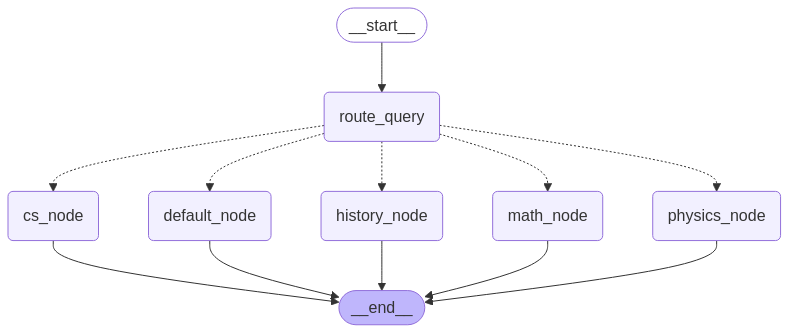

In [376]:
from IPython.display import Image

Image(multi_prompt_chain.get_graph().draw_mermaid_png())

#### 4.1.9 进行提问

<span style="color:#00ff00">
现在我们可以利用上述定义的路由链来回答问题了。
</span>

如果我们问一个物理问题，我们希望看到他被路由到物理链路


In [384]:
# 问题：什么是黑体辐射？
state = multi_prompt_chain.invoke({"input": "什么是黑体辐射？"})

<span style="color:#00ff00">
我们的输出是一个先前定义的<code>MultiPromptState</code>类。可以看到，<code>routing_result</code>键中的<code>destination</code>为<code>物理学</code>，这表明输入被路由到了物理链路。
</span>

In [385]:
state

{'input': '什么是黑体辐射？',
 'routing_result': {'destination': '物理学',
  'next_inputs': '什么是黑体辐射？请详细解释其概念及相关定律。'},
 'answer': '黑体辐射是指一个理想化的物体（称为黑体）在热平衡状态下所发出的辐射。黑体能够吸收所有入射的电磁辐射，而不反射或透过任何光线，因此它是一个完美的辐射体。黑体辐射的研究是热辐射和量子物理的重要基础。\n\n### 黑体辐射的主要概念：\n\n1. **黑体**：理想化的物体，能够完全吸收所有波长的辐射，并且在任何温度下都能发出辐射。\n\n2. **热平衡**：当黑体的温度保持恒定时，它所发出的辐射与其吸收的辐射达到平衡。\n\n3. **辐射谱**：黑体辐射的强度与波长的关系，通常用波长或频率表示。黑体辐射的谱是连续的，且在不同温度下具有不同的分布。\n\n### 相关定律：\n\n1. **维恩位移定律**：该定律描述了黑体辐射的峰值波长与温度之间的关系。公式为：\n   \\[\n   \\lambda_{\\text{max}} = \\frac{b}{T}\n   \\]\n   其中，\\( \\lambda_{\\text{max}} \\) 是辐射强度最大的波长，\\( T \\) 是黑体的绝对温度，\\( b \\) 是一个常数（约为2898 μm·K）。\n\n2. **斯特藩-玻尔兹曼定律**：该定律表明，黑体辐射的总能量与其温度的四次方成正比。公式为：\n   \\[\n   E = \\sigma T^4\n   \\]\n   其中，\\( E \\) 是单位面积上辐射的总能量，\\( \\sigma \\) 是斯特藩-玻尔兹曼常数（约为 \\( 5.67 \\times 10^{-8} \\, \\text{W/m}^2\\text{K}^4 \\)）。\n\n3. **普朗克定律**：普朗克提出了描述黑体辐射的数学模型，给出了辐射强度与波长和温度的关系。公式为：\n   \\[\n   I(\\lambda, T) = \\frac{2\\pi hc}{\\lambda^5} \\cdot \\frac{1}{e^{\\frac{hc}{\\lambda k T}} - 1}\n   \\]\n   其

<span style="color:#00ff00">
通过调用<code>state["answer"]</code>，我们可以获取到最终的答案。
</span>

In [386]:
state["answer"]

'黑体辐射是指一个理想化的物体（称为黑体）在热平衡状态下所发出的辐射。黑体能够吸收所有入射的电磁辐射，而不反射或透过任何光线，因此它是一个完美的辐射体。黑体辐射的研究是热辐射和量子物理的重要基础。\n\n### 黑体辐射的主要概念：\n\n1. **黑体**：理想化的物体，能够完全吸收所有波长的辐射，并且在任何温度下都能发出辐射。\n\n2. **热平衡**：当黑体的温度保持恒定时，它所发出的辐射与其吸收的辐射达到平衡。\n\n3. **辐射谱**：黑体辐射的强度与波长的关系，通常用波长或频率表示。黑体辐射的谱是连续的，且在不同温度下具有不同的分布。\n\n### 相关定律：\n\n1. **维恩位移定律**：该定律描述了黑体辐射的峰值波长与温度之间的关系。公式为：\n   \\[\n   \\lambda_{\\text{max}} = \\frac{b}{T}\n   \\]\n   其中，\\( \\lambda_{\\text{max}} \\) 是辐射强度最大的波长，\\( T \\) 是黑体的绝对温度，\\( b \\) 是一个常数（约为2898 μm·K）。\n\n2. **斯特藩-玻尔兹曼定律**：该定律表明，黑体辐射的总能量与其温度的四次方成正比。公式为：\n   \\[\n   E = \\sigma T^4\n   \\]\n   其中，\\( E \\) 是单位面积上辐射的总能量，\\( \\sigma \\) 是斯特藩-玻尔兹曼常数（约为 \\( 5.67 \\times 10^{-8} \\, \\text{W/m}^2\\text{K}^4 \\)）。\n\n3. **普朗克定律**：普朗克提出了描述黑体辐射的数学模型，给出了辐射强度与波长和温度的关系。公式为：\n   \\[\n   I(\\lambda, T) = \\frac{2\\pi hc}{\\lambda^5} \\cdot \\frac{1}{e^{\\frac{hc}{\\lambda k T}} - 1}\n   \\]\n   其中，\\( I(\\lambda, T) \\) 是波长为 \\( \\lambda \\) 时的辐射强度，\\( h \\) 是普朗克常数，\\( c \\) 是光速，\\( k \\) 是玻尔兹曼常数。\n\n### 总结：\n黑体辐

如果我们问一个数学问题，我们希望看到他被路由到数学链路。

In [387]:
# 问题：2+2等于多少？
state = multi_prompt_chain.invoke({"input": "2 + 2 等于多少"})

In [388]:
state

{'input': '2 + 2 等于多少',
 'routing_result': {'destination': '数学', 'next_inputs': '2 + 2 等于多少'},
 'answer': '要解决这个问题，我们可以将其分解为简单的部分。\n\n1. 我们有两个数字：2 和 2。\n2. 我们需要将这两个数字相加。\n\n根据基本的加法规则：\n\\[ 2 + 2 = 4 \\]\n\n因此，2 + 2 等于 4。'}

如果我们问一个历史问题，我们希望看到他被路由到历史链路。

In [389]:
# 问题：你知道李白是谁嘛?
state = multi_prompt_chain.invoke({"input": "你知道李白是谁嘛?"})

In [390]:
state

{'input': '你知道李白是谁嘛?',
 'routing_result': {'destination': '历史', 'next_inputs': '你能告诉我关于李白的生平和成就吗?'},
 'answer': '李白（701年－762年），字太白，号青莲居士，唐代著名的诗人，被誉为“诗仙”。他出生于今天的四川省，早年生活在一个商人家庭，后来随父亲迁居到不同的地方，最终定居在长安（今西安）。\n\n### 生平\n\n李白的早年生活相对不详，但他自幼聪慧，才华横溢，尤其擅长诗歌。他在年轻时游历了许多地方，广泛接触了当时的文化和社会，结识了许多文人雅士。李白的游历不仅丰富了他的生活经历，也为他的诗歌创作提供了丰富的素材。\n\n在他大约二十多岁时，李白曾试图通过科举考试进入仕途，但未能如愿。此后，他选择了游历四方，过着一种自由自在的生活。他的诗歌风格受到了道教思想的影响，常常表现出对自然的热爱和对自由的向往。\n\n李白在唐玄宗时期（712年－756年）达到了创作的巅峰，曾受到皇帝的宠信，短暂地担任过一些官职，但由于性格豪放不羁，最终未能在官场上长久立足。安史之乱（755年－763年）爆发后，李白的生活受到影响，他曾被卷入政治漩涡，后期生活相对困顿。\n\n李白于762年去世，享年62岁。他的墓地位于今四川省的青莲乡。\n\n### 成就\n\n李白的诗歌以其豪放、奔放的风格著称，常常表现出对人生、自然和自由的深刻思考。他的作品数量庞大，现存诗作约有900首，涵盖了五言、七言、古体诗和律诗等多种形式。\n\n李白的诗歌主题广泛，包括山水、友情、酒、人生哲理等。他的代表作有《将进酒》、《庐山谣》、《月下独酌》、《静夜思》等。其中，《将进酒》以其豪放的气势和对人生短暂的感慨而广为流传。\n\n李白的诗歌不仅在中国文学史上占有重要地位，也对后世的诗人产生了深远的影响。他的作品被翻译成多种语言，广泛传播，成为世界文学宝库中的瑰宝。\n\n总的来说，李白以其卓越的才华和独特的个性，成为中国文学史上不可磨灭的巨匠，他的诗歌至今仍然被人们广泛传颂和研究。'}

如果我们传递一个与任何子链路都无关的问题时，会发生什么呢？

这里，我们问了一个关于生物学的问题，我们可以看到它选择的链路是<span style="color:red">其他</span>。这意味着它将被**传递到默认链路，它本身只是对语言模型的通用调用**。语言模型幸运地对生物学知道很多，所以它可以帮助我们。

In [369]:
# 问题：为什么我们身体里的每个细胞都包含DNA？
state = multi_prompt_chain.invoke({"input": "为什么我们身体里的每个细胞都包含DNA？"})

In [370]:
state

{'input': '为什么我们身体里的每个细胞都包含DNA？',
 'routing_result': {'destination': '其他',
  'next_inputs': '为什么我们身体里的每个细胞都包含DNA的原因是什么？'},
 'answer': '每个细胞都包含DNA的原因主要有以下几点：\n\n1. **遗传信息的存储**：DNA（脱氧核糖核酸）是生物体遗传信息的载体，包含了构建和维持生命所需的所有信息。每个细胞中的DNA都携带着该生物体的遗传特征和发展指令。\n\n2. **细胞功能的调控**：不同类型的细胞（如肌肉细胞、神经细胞等）虽然都含有相同的DNA，但它们的功能和特性是由基因的表达调控的。细胞通过选择性地表达特定的基因来执行不同的功能。\n\n3. **自我复制**：在细胞分裂过程中，DNA能够准确复制自身，确保每个新细胞都能获得完整的遗传信息。这对于生长、修复和繁殖至关重要。\n\n4. **适应与进化**：DNA的变异和重组为生物体提供了适应环境变化的能力，推动了进化过程。细胞中的DNA能够通过突变和基因重组等方式产生遗传多样性。\n\n5. **细胞的统一性**：尽管不同细胞类型具有不同的功能，但它们都源于同一个受精卵，所有细胞都保留了相同的DNA，这为生物体的整体协调和功能提供了基础。\n\n综上所述，DNA在细胞中的存在是生命的基本特征之一，确保了遗传信息的传递、细胞功能的多样性以及生物体的生长和适应能力。'}

### 4.2 旧版API

<span style="color:#00ff00">
旧版API中，使用的基础LLM链<code>LLMChain</code>和最终的组合器<code>MultiPromptChain</code>都将在未来被废弃。
</span>


#### 4.2.1 定义提示模板

In [411]:
# 中文
#第一个提示适合回答物理问题
physics_template = """你是一个非常聪明的物理专家。 \
你擅长用一种简洁并且易于理解的方式去回答问题。\
当你不知道问题的答案时，你承认\
你不知道.

这是一个问题:
{input}"""


#第二个提示适合回答数学问题
math_template = """你是一个非常优秀的数学家。 \
你擅长回答数学问题。 \
你之所以如此优秀， \
是因为你能够将棘手的问题分解为组成部分，\
回答组成部分，然后将它们组合在一起，回答更广泛的问题。

这是一个问题：
{input}"""


#第三个适合回答历史问题
history_template = """你是以为非常优秀的历史学家。 \
你对一系列历史时期的人物、事件和背景有着极好的学识和理解\
你有能力思考、反思、辩证、讨论和评估过去。\
你尊重历史证据，并有能力利用它来支持你的解释和判断。

这是一个问题:
{input}"""


#第四个适合回答计算机问题
computerscience_template = """ 你是一个成功的计算机科学专家。\
你有创造力、协作精神、\
前瞻性思维、自信、解决问题的能力、\
对理论和算法的理解以及出色的沟通技巧。\
你非常擅长回答编程问题。\
你之所以如此优秀，是因为你知道  \
如何通过以机器可以轻松解释的命令式步骤描述解决方案来解决问题，\
并且你知道如何选择在时间复杂性和空间复杂性之间取得良好平衡的解决方案。

这还是一个输入：
{input}"""

#### 4.2.2 对提示模版进行命名和描述

在定义了这些提示模板后，我们可以为每个模板命名，并给出具体描述。例如，第一个物理学的描述适合回答关于物理学的问题，这些信息将传递给路由链，然后<span style="color:red">由路由链决定</span>何时使用此子链。


In [412]:
# 中文
prompt_infos = [
    {
        "名字": "物理学", 
        "描述": "擅长回答关于物理学的问题", 
        "提示模板": physics_template
    },
    {
        "名字": "数学", 
        "描述": "擅长回答数学问题", 
        "提示模板": math_template
    },
    {
        "名字": "历史", 
        "描述": "擅长回答历史问题", 
        "提示模板": history_template
    },
    {
        "名字": "计算机科学", 
        "描述": "擅长回答计算机科学问题", 
        "提示模板": computerscience_template
    }
]


`LLMRouterChain`（此链<span style="color:red">使用 LLM </span>来确定如何路由事物）

在这里，我们需要一个**多提示链**。这是一种特定类型的链，用于在多个不同的提示模板之间进行路由。 但是这只是路由的一种类型，我们也可以在任何类型的链之间进行路由。

这里我们要实现的几个类是大模型路由器链。这个类本身使用语言模型来在不同的子链之间进行路由。这就是上面提供的描述和名称将被使用的地方。

#### 4.2.3 基于提示模版信息创建相应目标链  
<span style="color:red">目标链</span>是由路由链调用的链，每个目标链都是一个语言模型链

In [407]:
# 中文
destination_chains = {}
for p_info in prompt_infos:
    name = p_info["名字"]
    prompt_template = p_info["提示模板"]
    prompt = ChatPromptTemplate.from_template(template=prompt_template)
    chain = LLMChain(llm=llm, prompt=prompt)
    destination_chains[name] = chain  
    
destinations = [f"{p['名字']}: {p['描述']}" for p in prompt_infos]
destinations_str = "\n".join(destinations)

#### 4.2.4 创建默认目标链

In [416]:
default_prompt = ChatPromptTemplate.from_template("{input}")
default_chain = LLMChain(llm=llm, prompt=default_prompt)

#### 4.2.5 定义不同链之间的路由模板

这包括要完成的任务的说明以及输出应该采用的特定格式。

<span style="color:#00ff00">
我们将在下面说明为什么这个模版要采用如此奇怪的大括号格式。
</span>

In [419]:
# 中文

# 多提示路由模板
MULTI_PROMPT_ROUTER_TEMPLATE = """给语言模型一个原始文本输入，\
让其选择最适合输入的模型提示。\
系统将为您提供可用提示的名称以及最适合改提示的描述。\
如果你认为修改原始输入最终会导致语言模型做出更好的响应，\
你也可以修改原始输入。


<< 格式 >>
返回一个带有JSON对象的markdown代码片段，该JSON对象的格式如下：
```json
{{{{
    "destination": 字符串 \ 使用的提示名字或者使用 "DEFAULT"
    "next_inputs": 字符串 \ 原始输入的改进版本
}}}}
```


记住：“destination”必须是下面指定的候选提示名称之一，\
或者如果输入不太适合任何候选提示，\
则可以是 “DEFAULT” 。
记住：如果您认为不需要任何修改，\
则 “next_inputs” 可以只是原始输入。

<< 候选提示 >>
{destinations}

<< 输入 >>
{{input}}

<< 输出 (记得要包含 ```json)>>

样例:
<< 输入 >>
"什么是黑体辐射?"
<< 输出 >>
```json
{{{{
    "destination": 字符串 \ 使用的提示名字或者使用 "DEFAULT"
    "next_inputs": 字符串 \ 原始输入的改进版本
}}}}
```

"""

#### 4.2.6 构建路由链

<span style="color:#00ff00">我们首先补完模版。</span>这个模板可以适用许多不同类型的目标。
因此，在这里，您可以添加一个不同的学科，如英语或拉丁语，而不仅仅是物理、数学、历史和计算机科学。

In [431]:
router_template = MULTI_PROMPT_ROUTER_TEMPLATE.format(
    destinations=destinations_str
)

<span style="color:#00ff00">
正是因为我们之前的路由模版并不完整（缺少关键的<code>destination</code>信息），因此我们需要首先调用<code>format</code>方法补完模版。而在对<code>str</code>类型进行格式化时，和之前的情况类似，单大括号<code>{变量名}</code>
将被视为占位符，会被对应参数替换；而双大括号<code>{{变量名}}</code>则会被会被自动转译为单个大括号字面值。
</span>


In [432]:
router_template

'给语言模型一个原始文本输入，让其选择最适合输入的模型提示。系统将为您提供可用提示的名称以及最适合改提示的描述。如果你认为修改原始输入最终会导致语言模型做出更好的响应，你也可以修改原始输入。\n\n\n<< 格式 >>\n返回一个带有JSON对象的markdown代码片段，该JSON对象的格式如下：\n```json\n{{\n    "destination": 字符串 \\ 使用的提示名字或者使用 "DEFAULT"\n    "next_inputs": 字符串 \\ 原始输入的改进版本\n}}\n```\n\n\n记住：“destination”必须是下面指定的候选提示名称之一，或者如果输入不太适合任何候选提示，则可以是 “DEFAULT” 。\n记住：如果您认为不需要任何修改，则 “next_inputs” 可以只是原始输入。\n\n<< 候选提示 >>\n物理学: 擅长回答关于物理学的问题\n数学: 擅长回答数学问题\n历史: 擅长回答历史问题\n计算机科学: 擅长回答计算机科学问题\n\n<< 输入 >>\n{input}\n\n<< 输出 (记得要包含 ```json)>>\n\n样例:\n<< 输入 >>\n"什么是黑体辐射?"\n<< 输出 >>\n```json\n{{\n    "destination": 字符串 \\ 使用的提示名字或者使用 "DEFAULT"\n    "next_inputs": 字符串 \\ 原始输入的改进版本\n}}\n```\n\n'

<span style="color:#00ff00">
可以看到，补完后的模版<code>router_template</code>中，所有的双大括号变成了单大括号（四个大括号也因此变为双大括号）。这样，模板就能正确的导入<code>input</code>信息（此时被单大括号包围）。而不希望被视为替换变量的<code>json格式说明</code>，则被保留为双大括号。
</span>


接下来，我们利用<code>PromptTemplate</code>创建<span style="color:red">完整的路由器模板</span>。这里指定输出格式通过<code>RouterOutputParser</code>解析器进行解析，以确保输出格式正确。这个路由输出解析非常重要，因为它将帮助这个链路决定在哪些子链路之间进行路由。


In [435]:
from langchain_core.prompts import PromptTemplate
from langchain.chains.router.llm_router import LLMRouterChain, RouterOutputParser
router_prompt = PromptTemplate(
    template=router_template,
    input_variables=["input"],
    output_parser=RouterOutputParser(),
)

最后，通过传入llm和整个路由提示来创建路由链。

In [436]:
router_chain = LLMRouterChain.from_llm(llm, router_prompt)

#### 4.2.7 创建整体链路

<span style="color:#00ff00">
最后，利用<code>MultiPromptChain</code>创建整体链路，它将所有链路组合在一起。
</span>

In [437]:
from langchain.chains.router.multi_prompt import MultiPromptChain

#多提示链
chain = MultiPromptChain(router_chain=router_chain,    #路由链路
                         destination_chains=destination_chains,   #目标链路
                         default_chain=default_chain,      #默认链路
                         verbose=True   
                        )

#### 4.2.8 进行提问

<span style="color:#00ff00">
可以看到，路由链成功将问题路由到了正确的链路。而当问题与所有链路都无关时，则被路由到了默认链路。
</span>


In [438]:
#中文
chain.run("什么是黑体辐射？")



> Entering new MultiPromptChain chain...
物理学: {'input': '什么是黑体辐射？'}
> Finished chain.


'黑体辐射是指一个理想化的物体（称为黑体）在热平衡状态下所发出的辐射。黑体能够吸收所有波长的电磁辐射，并且在任何温度下都会以特定的方式发出辐射。黑体辐射的特点是其辐射强度与温度有关，并且在不同波长下的分布遵循普朗克定律。\n\n简单来说，黑体辐射是物体因温度而发出的光和热的表现，温度越高，辐射的强度和波长分布也会发生变化。例如，随着温度升高，黑体辐射会从红色转向蓝色。这个概念在热力学和量子物理中非常重要，帮助我们理解光的性质和物质的行为。'

In [423]:
# 中文
chain.run("2 + 2 等于多少")



> Entering new MultiPromptChain chain...
数学: {'input': '2 + 2 等于多少'}
> Finished chain.


'2 + 2 等于 4。\n\n这个问题很简单，可以直接得出答案。我们可以将其分解为两个部分：首先，理解数字 2 的含义，其次，理解加法运算的规则。将两个 2 相加，得到的结果就是 4。'

In [424]:
# 中文
chain.run("你知道李白是谁嘛?")



> Entering new MultiPromptChain chain...
历史: {'input': '你能告诉我李白是谁吗？'}
> Finished chain.


'李白（701年－762年），字太白，号青莲居士，唐代著名的诗人，被誉为“诗仙”。他出生于今天的四川省，早年游历四方，广交朋友，尤其与当时的文人墨客有着密切的交往。\n\n李白的诗歌以豪放、奔放著称，常常表达对自由、自然和人生的热爱。他的作品中充满了丰富的想象力和独特的个性，常常运用夸张和比喻，展现出他对生活的热情和对理想的追求。李白的诗风与杜甫并称，二人被视为唐诗的巅峰代表。\n\n李白的代表作包括《将进酒》、《庐山谣》、《夜泊牛津口》等。他的诗歌不仅在中国文学史上占有重要地位，也对后世的诗人产生了深远的影响。李白的生活经历丰富多彩，他曾在朝廷任职，但因性格洒脱而屡遭挫折，最终选择了隐居生活。\n\n李白的诗歌不仅反映了个人的情感和理想，也折射出唐代社会的风貌和文化氛围。他的作品至今仍被广泛传颂，成为中国文学的瑰宝。'

In [425]:
# 中文
chain.run("为什么我们身体里的每个细胞都包含DNA？")



> Entering new MultiPromptChain chain...
None: {'input': '为什么我们身体里的每个细胞都包含DNA？'}
> Finished chain.


'每个细胞都包含DNA的原因主要与遗传信息的存储和传递有关。以下是一些关键点：\n\n1. **遗传信息的存储**：DNA（脱氧核糖核酸）是生物体内遗传信息的主要载体。它包含了构建和维持生物体所需的所有信息，包括蛋白质的合成指令。\n\n2. **细胞功能的调控**：每个细胞都需要根据其特定的功能来表达不同的基因。DNA中的信息通过转录和翻译过程转化为RNA和蛋白质，从而决定细胞的结构和功能。\n\n3. **细胞分裂和遗传传递**：在细胞分裂过程中，DNA会被复制并传递给子细胞，确保每个新细胞都能获得完整的遗传信息。这对于生长、修复和繁殖至关重要。\n\n4. **多样性和适应性**：DNA的变异和重组为生物体提供了适应环境变化的能力。通过自然选择，具有有利基因的个体更可能生存和繁殖，从而将这些基因传递给后代。\n\n5. **细胞类型的多样性**：尽管所有细胞都含有相同的DNA，但不同类型的细胞（如肌肉细胞、神经细胞、皮肤细胞等）通过选择性表达不同的基因，展现出不同的特性和功能。\n\n总之，DNA是生命的基础，确保了生物体的遗传连续性和多样性，同时也为细胞的功能和适应性提供了必要的信息。'

### 4.3 总结

在[LangChain官方文档](https://python.langchain.com/docs/versions/migrating_chains/multi_prompt_chain/)中，给出了用<code>LangGraph</code>替换<code>MultiPromptChain</code>的优势。这主要是因为MultiPromptChain 不支持常见的聊天模型功能，例如消息角色和工具调用。而LangGraph 实现为这个问题带来了许多优势：

- 支持聊天提示模板，包括带有系统角色和其他角色的消息；
- 支持在路由步骤中使用工具调用；
- 支持单个步骤和输出令牌的流式传输。




### 4.4 <span style="color:#00ff00">更新：使用LangGraph预定义组件快速构建路由链</span>

<span style="color:#00ff00">
我们之前的基于LangGraph的新版API实现路由链的过程中包含了大量状态处理、路由函数、条件判断等细节。事实上，LangGraph为我们提供了众多强大的<code>预构建组件</code>，可以帮助我们快速构建路由链。
</span>


<span style="color:#00ff00">
本质上，这个实现是构建了一个能<code>自动选择合适工具的代理</code>，而不是传统意义上的路由链。这种方法本质上是从"手动构建路由系统"转变为"利用代理自动路由"的范式转换。现代LLM的工具调用能力使得这种方法不仅更简单，而且效果可能更好，因为它可以更灵活地处理各种查询和工具组合。从概念上讲，传统的MultiPromptChain是预先定义好路由逻辑的管道系统，而基于工具的代理则是一个能够<code>动态判断并选择工具的智能系统</code>，更符合现代LLM应用的设计理念。
</span>


<span style="color:#00ff00">

这个实现有几个主要优势：

1. <code>使用预构建组件</code>：使用<code>create_react_agent</code>函数一步创建完整代理，无需手动构建图结构
2. <code>更少的样板代码</code>：不需要定义状态类型、节点函数和边连接
3. <code>工具自动路由</code>：LLM会自动选择最合适的专家工具，无需手动编写路由逻辑。
4. <code>简洁的API</code>：代码更简洁、更易于理解和维护。
5. <code>支持工具调用</code>：充分利用现代LLM的工具调用能力，比传统MultiPromptChain更灵活。
6. <code>同样强大</code>：尽管代码更简洁，但功能同样强大，能够自动选择和调用合适的工具

这种实现方式避免了在之前的方法中需要的大量样板代码，如手动定义路由函数、条件判断等。LangGraph的预构建组件为我们处理了这些细节，使得代码更加简洁和可维护。

参考链接：
</span>


- [langgraph-prebuilt工具文档](https://langchain-ai.github.io/langgraph/reference/prebuilt/)
- [LangGraph工具调用指南](https://langchain-ai.github.io/langgraph/how-tos/tool-calling/)

In [1]:
"""
使用LangGraph的create_react_agent预构建函数实现简洁的专家路由系统

此示例展示了如何使用预构建的ReAct代理函数来替代传统的MultiPromptChain，
实现自动工具选择和调用的功能，代码更加简洁。
"""

from langchain_openai import ChatOpenAI
from langchain_core.tools import tool
from langgraph.prebuilt import create_react_agent

# 初始化语言模型
llm = ChatOpenAI(model="gpt-4o-mini")

# 定义专家工具
@tool
def physics_expert(question: str) -> str:
    """使用此工具咨询物理学专家。当问题与物理学相关时使用。"""
    prompt = f"""你是一个非常聪明的物理专家。 
    你擅长用一种简洁并且易于理解的方式去回答问题。
    当你不知道问题的答案时，你承认你不知道。
    
    问题: {question}"""
    
    return llm.invoke(prompt).content

@tool
def math_expert(question: str) -> str:
    """使用此工具咨询数学专家。当问题与数学相关时使用。"""
    prompt = f"""你是一个非常优秀的数学家。 
    你擅长回答数学问题。 
    你之所以如此优秀，是因为你能够将棘手的问题分解为组成部分，
    回答组成部分，然后将它们组合在一起，回答更广泛的问题。
    
    问题: {question}"""
    
    return llm.invoke(prompt).content

@tool
def history_expert(question: str) -> str:
    """使用此工具咨询历史学专家。当问题与历史相关时使用。"""
    prompt = f"""你是一位非常优秀的历史学家。 
    你对一系列历史时期的人物、事件和背景有着极好的学识和理解
    你有能力思考、反思、辩证、讨论和评估过去。
    
    问题: {question}"""
    
    return llm.invoke(prompt).content

@tool
def cs_expert(question: str) -> str:
    """使用此工具咨询计算机科学专家。当问题与计算机科学、编程相关时使用。"""
    prompt = f"""你是一个成功的计算机科学专家。
    你有创造力、协作精神、前瞻性思维、自信、解决问题的能力，
    对理论和算法的理解以及出色的沟通技巧。
    
    问题: {question}"""
    
    return llm.invoke(prompt).content

# 创建工具列表
tools = [physics_expert, math_expert, history_expert, cs_expert]

# 定义系统提示
system_prompt = """你是一个智能助手，可以回答各种领域的问题。
你有物理、数学、历史和计算机科学专家可以咨询。
根据问题的性质选择合适的专家工具。如果问题跨越多个领域，你可以调用多个专家工具。
确保提供全面准确的答案。"""

# 使用预构建函数创建ReAct代理
agent = create_react_agent(
    llm,
    tools,
    prompt=system_prompt
)

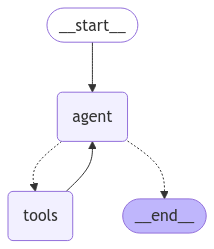

In [2]:
from IPython.display import Image, display

display(Image(agent.get_graph().draw_mermaid_png()))

In [3]:
def print_stream(stream):
    for s in stream:
        message = s["messages"][-1]
        if isinstance(message, tuple):
            print(message)
        else:
            message.pretty_print()

In [5]:
# 物理学问题测试
question = "什么是黑体辐射？"

inputs = {"messages": [("user", question)]}
print_stream(agent.stream(inputs, stream_mode="values"))

================================ Human Message =================================

什么是黑体辐射？
================================== Ai Message ==================================
Tool Calls:
  physics_expert (call_kIP1wuca5Y6zfT3LfdQQ33Ae)
 Call ID: call_kIP1wuca5Y6zfT3LfdQQ33Ae
  Args:
    question: 什么是黑体辐射？
================================= Tool Message =================================
Name: physics_expert

黑体辐射是指一种理想化的物体（称为黑体），它能够完全吸收所有波长的电磁辐射，并以其温度为特征发出辐射。黑体辐射的特点是它在任何温度下，发出的辐射强度和波长分布仅与其温度有关。 

根据普朗克定律，黑体在一定温度下发出的辐射强度与波长的关系呈现出特定的曲线，这就是著名的黑体辐射谱。随着温度的升高，辐射的峰值波长会向短波长方向移动（即威恩位移定律），同时辐射的总能量也会增加（即斯特藩—玻尔兹曼定律）。 

黑体辐射对于理解量子力学和热辐射现象有着重要的意义。
================================== Ai Message ==================================

黑体辐射是指一种理想化的物体（称为黑体），它能够完全吸收所有波长的电磁辐射，并以其温度为特征发出辐射。黑体辐射的特点是它在任何温度下，发出的辐射强度和波长分布仅与其温度有关。

根据普朗克定律，黑体在一定温度下发出的辐射强度与波长的关系呈现出特定的曲线，这就是著名的黑体辐射谱。随着温度的升高，辐射的峰值波长会向短波长方向移动（即威恩位移定律），同时辐射的总能量也会增加（即斯特藩—玻尔兹曼定律）。

黑体辐射对于理解量子力学和热辐射现象有着重要的意义。


<span style="color:#00ff00">
可以看到，我们的agent自动选择了<code>physics_expert</code>工具。
</span>

In [6]:
# 历史问题测试
question = "第二次世界大战是什么时候开始的？"

inputs = {"messages": [("user", question)]}
print_stream(agent.stream(inputs, stream_mode="values"))

================================ Human Message =================================

第二次世界大战是什么时候开始的？
================================== Ai Message ==================================
Tool Calls:
  history_expert (call_jtGrkh3f6THbsPcDg6fu7x2U)
 Call ID: call_jtGrkh3f6THbsPcDg6fu7x2U
  Args:
    question: 第二次世界大战是什么时候开始的？
================================= Tool Message =================================
Name: history_expert

第二次世界大战开始于1939年9月1日，当时德国入侵波兰，标志着战争的爆发。随后的几天里，英国和法国对德国宣战，正式参与到这场战争中。战争一直持续到1945年9月2日，日本在东京湾的美国战舰上签署投降书，标志着战争的结束。
================================== Ai Message ==================================

第二次世界大战开始于1939年9月1日，当时德国入侵波兰，随后英国和法国对德国宣战，从而正式参与了这场战争。战争持续到1945年9月2日，日本在美国战舰上签署投降书，标志着战争的结束。


<span style="color:#00ff00">
同样的，我们的agent自动选择了<code>history_expert</code>工具。
</span>